In [161]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

# Functions
def reg_of_interest(img, vertices):
    mask = np.zeros_like(img)
    channel_count = 1 #img.shape[2] # not for gray image
    match_mask_color = (255,)*channel_count
    cv2.fillPoly(mask,vertices,match_mask_color)
    masked_image = cv2.bitwise_and(img,mask)
    return masked_image

def draw_the_lines(img,lines):
    img = np.copy(img)
    blank_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(blank_img, (x1,y1), (x2,y2), (255,0,0), thickness=3)
    img = cv2.addWeighted(img, 0.8, blank_img, 1., 0.0) # merge 2 images
    return img

(540, 960, 3)


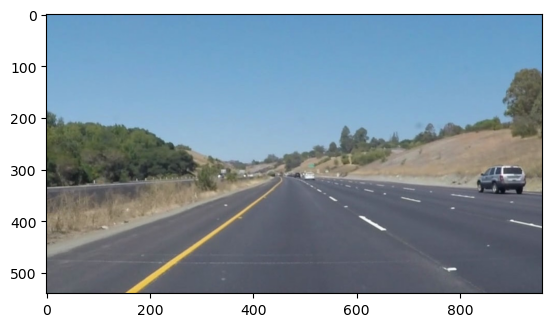

In [162]:
img = cv2.imread('C:/Users/surya/Desktop/Term Project test images and videos/test_images/solidYellowCurve.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

plt.imshow(img)

print(img.shape)
height = img.shape[0]
width = img.shape[1]

Reg_of_Int_Ver = [(0,height),(450,300),(width,height)]

## Find Edges in the Region of Interest

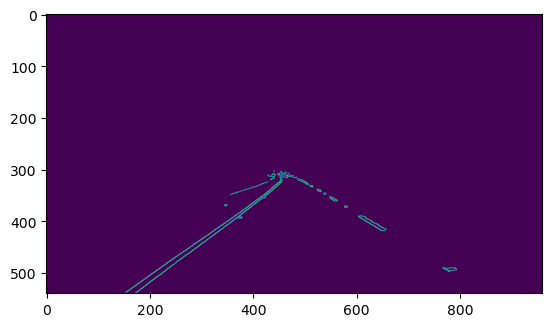

In [163]:
# Canny Edge Detection
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
canny_img = cv2.Canny(gray,100,200)
plt.imshow(canny_img)

# Take on Region of Interest
masked_img = reg_of_interest(canny_img,np.array([Reg_of_Int_Ver], np.int32),)
plt.imshow(masked_img)
plt.show()

## Draw lines on the edge detected Image

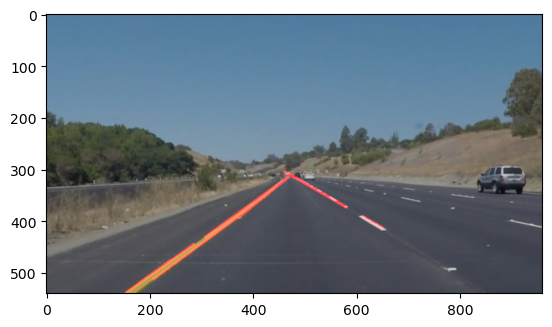

In [164]:
lines = cv2.HoughLinesP(masked_img,rho=6,theta=np.pi/60,threshold=160,lines = np.array([]),minLineLength=40,maxLineGap=25)
img_with_lines = draw_the_lines(img, lines)

plt.imshow(img_with_lines)
plt.show()